CEM Simulation
==============

This example show a CEM simulation.


In [ ]:

# Fixme: retrieve PDF reference and complete


import matplotlib.pyplot as plt


import PySpice.Logging.Logging as Logging
logger = Logging.setup_logging()


from PySpice.Doc.ExampleTools import find_libraries
from PySpice.Probe.Plot import plot
from PySpice.Spice.Library import SpiceLibrary
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *


libraries_path = find_libraries()
spice_library = SpiceLibrary(libraries_path)


from HP54501A import HP54501A



```
####################################################################################################

from PySpice.Spice.Netlist import SubCircuitFactory
from PySpice.Unit import *

####################################################################################################

class HP54501A(SubCircuitFactory):

    __name__ = 'HP54501A'
    __nodes__ = ('line_plus', 'line_minus')

    ##############################################

    def __init__(self, diode_model):

        super().__init__()

        self.C(1, 'line_plus', 'line_minus', 1@u_uF)

        self.X('D1', diode_model, 'top', 'line_plus')
        self.X('D2', diode_model, 'line_plus', 'scope_ground')
        self.X('D3', diode_model, 'top', 'line_minus')
        self.X('D4', diode_model, 'line_minus', 'scope_ground')

        self.R(1, 'top', 'output', 10)
        self.C(2, 'output', 'scope_ground', 50@u_uF)
        self.R(2, 'output', 'scope_ground', 900@u_Ω)
```


Text(0, 0.5, '[V]')

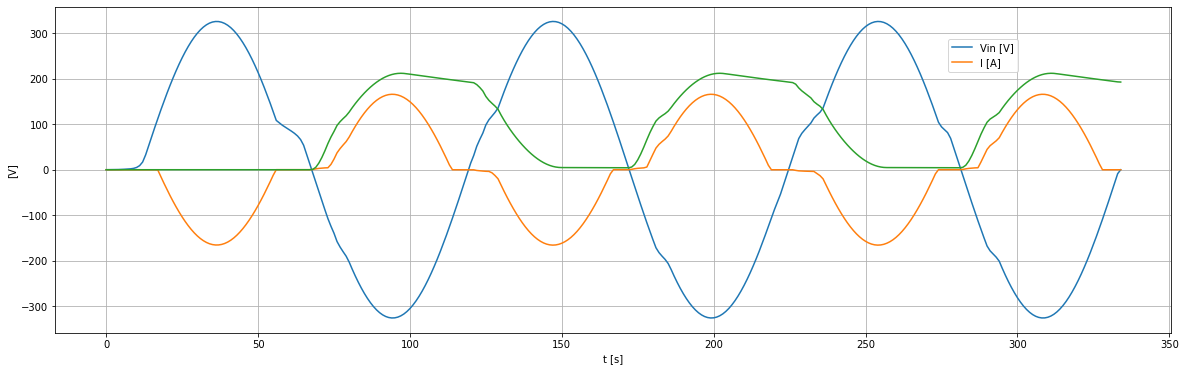

In [ ]:


circuit = Circuit('HP54501A CEM')
circuit.include(spice_library['1N4148'])
diode_model = '1N4148'
ac_line = circuit.AcLine('input', 'input', circuit.gnd, rms_voltage=230@u_V, frequency=50@u_Hz)
# circuit.subcircuit(HP54501A(diode_model='1N4148'))
# circuit.X('hp54501a', 'HP54501A', 'input', circuit.gnd)
circuit.C(1, 'input', circuit.gnd, 1@u_uF)
circuit.X('D1', diode_model, 'line_plus', 'top')
circuit.X('D2', diode_model, 'scope_ground', 'input')
circuit.X('D3', diode_model, circuit.gnd, 'top')
circuit.X('D4', diode_model, 'scope_ground', circuit.gnd)
circuit.R(1, 'top', 'output', 10@u_Ω)
circuit.C(2, 'output', 'scope_ground', 50@u_uF)
circuit.R(2, 'output', 'scope_ground', 900@u_Ω)

simulator = circuit.simulator(temperature=25, nominal_temperature=25)
analysis = simulator.transient(step_time=ac_line.period/100, end_time=ac_line.period*3)

figure, ax = plt.subplots(figsize=(20, 6))

ax.plot(analysis.input)
ax.plot(analysis.Vinput)
ax.plot(analysis.output - analysis.scope_ground)
ax.legend(('Vin [V]', 'I [A]'), loc=(.8,.8))
ax.grid()
ax.set_xlabel('t [s]')
ax.set_ylabel('[V]')


